<a href="https://colab.research.google.com/github/suhaassanga/2216114_AIML_BootCamp/blob/Suhaas-Sanga/KNN_Outbreak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/outbreak_detect.csv")
df.head()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,No
1,34.0,23.0,83.27,15.22,10717,677,Yes
2,40.0,23.0,50.74,0.00,1257,127,No
3,NaN,24.0,84.57,11.15,9693,482,No
4,34.0,24.0,59.16,9.06,4198,211,No


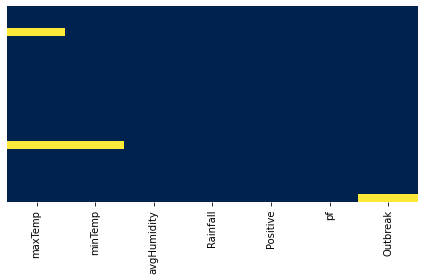

In [ ]:
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='cividis')
  plt.tight_layout()
  return plt.show()
get_heatmap(df)

In [ ]:
df = df.dropna()
df.head()


,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,No
1,34.0,23.0,83.27,15.22,10717,677,Yes
2,40.0,23.0,50.74,0.00,1257,127,No
4,34.0,24.0,59.16,9.06,4198,211,No
5,34.0,27.0,73.23,0.00,11808,712,Yes


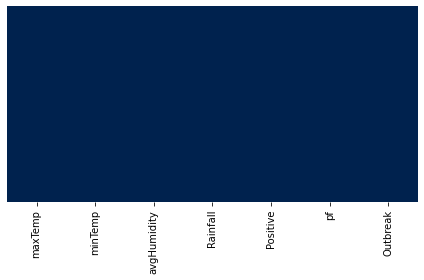

In [ ]:
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='cividis')
  plt.tight_layout()
  return plt.show()
get_heatmap(df)

In [ ]:
from sklearn import preprocessing
LE= preprocessing.LabelEncoder()
df.Outbreak = LE.fit_transform(df.Outbreak)
df.head()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,0
1,34.0,23.0,83.27,15.22,10717,677,1
2,40.0,23.0,50.74,0.00,1257,127,0
4,34.0,24.0,59.16,9.06,4198,211,0
5,34.0,27.0,73.23,0.00,11808,712,1


In [ ]:
from sklearn import preprocessing
LE= preprocessing.LabelEncoder()
df.Outbreak = LE.fit_transform(df.Outbreak)
df.head()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,0
1,34.0,23.0,83.27,15.22,10717,677,1
2,40.0,23.0,50.74,0.00,1257,127,0
4,34.0,24.0,59.16,9.06,4198,211,0
5,34.0,27.0,73.23,0.00,11808,712,1


In [ ]:
df = df.drop('Positive',axis=1)
df = df.drop('pf',axis=1)

In [ ]:
df.head()

,maxTemp,minTemp,avgHumidity,Rainfall,Outbreak
0,29.0,18.0,49.74,0.00,0
1,34.0,23.0,83.27,15.22,1
2,40.0,23.0,50.74,0.00,0
4,34.0,24.0,59.16,9.06,0
5,34.0,27.0,73.23,0.00,1


In [ ]:
from sklearn.preprocessing import StandardScaler
sst = StandardScaler()
data_scaled=df.iloc[:,:-1].values
data_scaled=sst.fit_transform(data_scaled)
data_scaled=pd.DataFrame(data_scaled)
data_scaled.head()


,0,1,2,3
0,-1.329034,-2.078144,-1.197198,-0.684437
1,-0.196894,-0.333717,1.042817,0.918413
2,1.161674,-0.333717,-1.130392,-0.684437
3,-0.196894,0.015169,-0.567883,0.269690
4,-0.196894,1.061826,0.372082,-0.684437


In [ ]:
data_scaled.columns=['maxTemp','minTemp','avgHumidity','Rainfall']
data_scaled.head()


,maxTemp,minTemp,avgHumidity,Rainfall
0,-1.329034,-2.078144,-1.197198,-0.684437
1,-0.196894,-0.333717,1.042817,0.918413
2,1.161674,-0.333717,-1.130392,-0.684437
3,-0.196894,0.015169,-0.567883,0.269690
4,-0.196894,1.061826,0.372082,-0.684437


In [ ]:
data_scaled['Class']=df.Outbreak
data_scaled

,maxTemp,minTemp,avgHumidity,Rainfall,Class
0,-1.329034,-2.078144,-1.197198,-0.684437,0.0
1,-0.196894,-0.333717,1.042817,0.918413,1.0
2,1.161674,-0.333717,-1.130392,-0.684437,0.0
3,-0.196894,0.015169,-0.567883,0.269690,NaN
4,-0.196894,1.061826,0.372082,-0.684437,0.0
5,-0.876178,0.015169,1.410252,3.675483,1.0
6,-0.423322,0.015169,0.686740,1.830415,1.0
7,-0.876178,0.015169,1.129666,0.489793,1.0
8,0.255962,0.015169,-0.952687,-0.461175,0.0
9,-0.649750,-0.333717,-0.678781,-0.684437,0.0


In [ ]:
data_scaled = data_scaled[data_scaled['Class'].notna()]

In [ ]:
x = data_scaled.iloc[:,0:4]
y = data_scaled.iloc[:,4:5]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [ ]:
x_train

,maxTemp,minTemp,avgHumidity,Rainfall
22,-0.423322,-0.682602,0.404149,-0.500141
16,1.161674,1.061826,-0.246544,-0.684437
5,-0.876178,0.015169,1.410252,3.675483
17,0.935246,0.364054,-1.345508,-0.684437
14,-0.423322,-0.333717,0.889163,0.044323
12,2.293814,2.806253,-2.199293,-0.644418
8,0.255962,0.015169,-0.952687,-0.461175
13,1.840958,1.410711,0.094168,-0.194736
11,1.614530,0.015169,-1.217908,-0.453803
10,-0.196894,-2.078144,-0.551849,-0.684437


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
import numpy as np
y_pred=model.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))


AttributeError: ignored

In [ ]:
print("Predicted value for training data:",model.score(x_train,y_train))
print("Training accuracy:",model.score(x_train,y_train)*100)

Predicted value for training data: 0.875
Training accuracy: 87.5


In [ ]:
print("Predicted·value·for·testing·data:",model.score(x_test,y_test))
print("Testing·accuracy:",model.score(x_test,y_test)*100)

Predicted·value·for·testing·data: 0.6
Testing·accuracy: 60.0


In [ ]:
accuracy=model.score(x,y)*100
print(accuracy)

80.95238095238095
